<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica24RegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Herrera Castro Jonathan Adrian
*   Matrícula: 255497

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## ***Parte 1: Carga de datos y bibliotecas***
**1. Importa las bibliotecas necesarias**


In [21]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Carga el archivo `advertising.csv`**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Unidad04/advertising.csv', engine="python")

**3. Muestra las primeras filas del dataframe**

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**4. Describe estadísticamente las variables**

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
TV_moda = df['TV'].mode().iloc[0]
Radio_moda = df['Radio'].mode().iloc[0]
Newspaper_moda = df['Newspaper'].mode().iloc[0]
Sales_moda = df['Sales'].mode().iloc[0]

TV_mediana = df['TV'].median()
Radio_mediana = df['Radio'].median()
Newspaper_mediana = df['Newspaper'].median()
Sales_mediana = df['Sales'].median()

TV_Rango = df['TV'].max() - df['TV'].min()
Radio_Rango = df['Radio'].max() - df['Radio'].min()
Newspaper_Rango = df['Newspaper'].max() - df['Newspaper'].min()
Sales_Rango = df['Sales'].max() - df['Sales'].min()

TV_varianza = df['TV'].var()
Radio_varianza = df['Radio'].var()
Newspaper_varianza = df['Newspaper'].var()
Sales_varianza = df['Sales'].var()

print("Moda:")
print("TV:", TV_moda)
print("Radio:", Radio_moda)
print("Newspaper:", Newspaper_moda)
print("Sales:", Sales_moda)

print("\n")

print("Mediana:")
print("TV:", TV_mediana)
print("Radio:", Radio_mediana)
print("Newspaper:", Newspaper_mediana)
print("Sales:", Sales_mediana)

print("\n")

print("Rango:")
print("TV:", TV_Rango)
print("Radio:", Radio_Rango)
print("Newspaper:", Newspaper_Rango)
print("Sales:", Sales_Rango)

print("\n")

print("Varianza:")
print(f"TV: {TV_varianza:.4f}")
print(f"Radio: {Radio_varianza:.4f}")
print(f"Newspaper: {Newspaper_varianza:.4f}")
print(f"Sales: {Sales_varianza:.4f}")

Moda:
TV: 17.2
Radio: 4.1
Newspaper: 8.7
Sales: 11.9


Mediana:
TV: 149.75
Radio: 22.9
Newspaper: 25.75
Sales: 16.0


Rango:
TV: 295.7
Radio: 49.6
Newspaper: 113.7
Sales: 25.4


Varianza:
TV: 7370.9499
Radio: 220.4277
Newspaper: 474.3083
Sales: 27.9195


In [12]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [13]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


## ***Parte 2: Análisis exploratorio de los datos***


### **2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes**

**1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot**

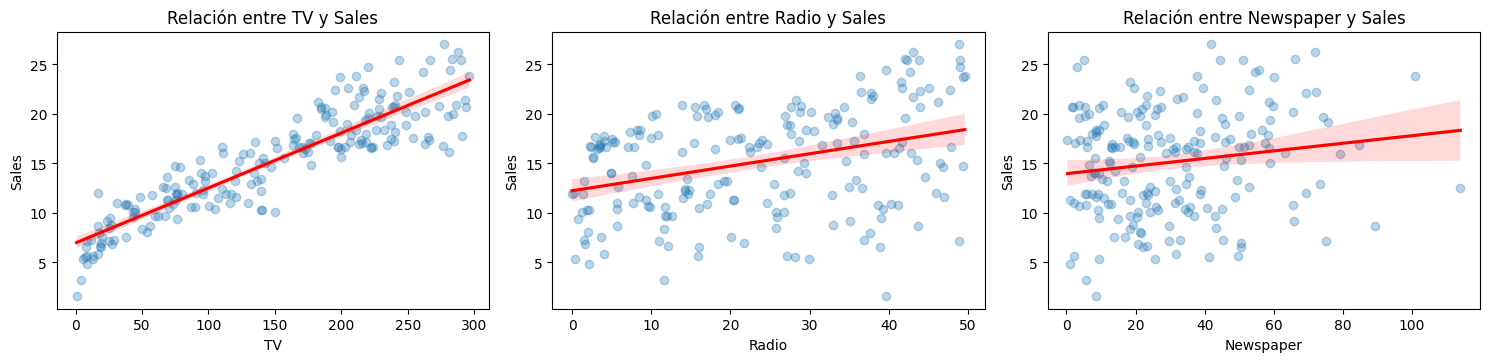

In [15]:
X = df.drop(columns='Sales')
y = df['Sales']

plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x = X[col], y = y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.title(f"Relación entre {col} y Sales")

plt.tight_layout()
plt.show()

**2. Interpreta visualmente la relación entre variables**

### **2.2: Correlación entre variables**


**1. Calcula la matriz de correlación**

In [19]:
correlacion = df.corr()
print(correlacion)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


**2. Visualízala con un heatmap**

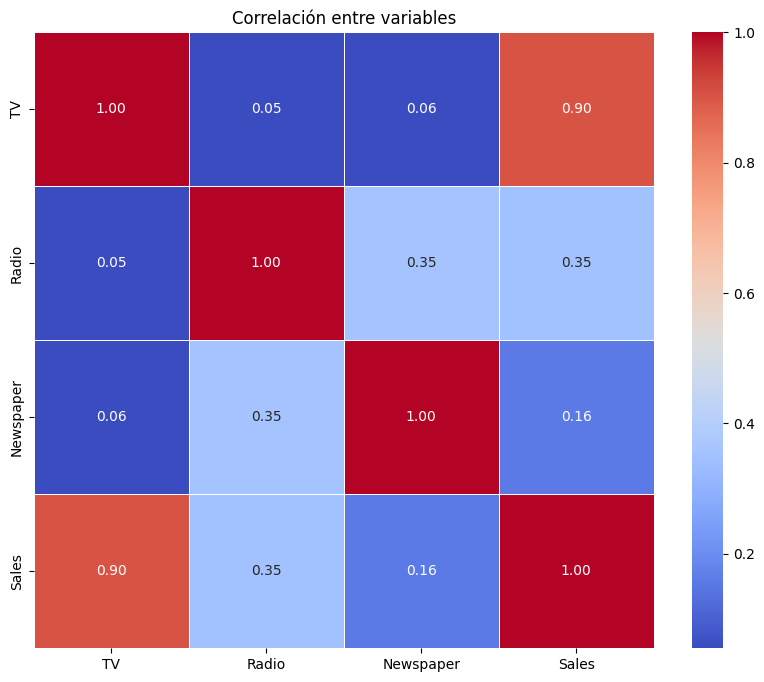

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlación entre variables")
plt.show()

**3. Responde: ¿Qué variables están más correlacionadas con Sales? ¿Hay correlación alta entre predictores?**

## ***Parte 3. Multicolinealidad***


**1. Calcula el VIF (Variance Inflation Factor) para cada predictor**

In [22]:
X = add_constant(df.drop(columns=['Sales']))
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


**2. Crea un diagrama de barras para mostrar el VIF**

**3. Interpreta si hay multicolinealidad:**


*   ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
*   ¿Qué implicaciones tiene esto para el modelo?



## ***Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación***

###**4.1 Entrenamiento del Modelo (Todas las Variables Independientes)**

**1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes**

**2. Imprime el intercepto y los coeficientes del modelo**

**3. Interpreta cada uno: ¿Qué significa cada uno de los coeficientes en términos de ventas?**

### **4.2 Normalidad de los residuos**


**1. Calcula los residuos: residuos = y - y_pred**

**2. Grafica un histograma con KDE de los residuos**

**3. ¿Los residuos parecen distribuirse normalmente?**

### ***4.3. Homocedasticidad***

**1. Grafica los residuos contra los valores predichos**

**2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?**

### **4.4 Q-Q Plot**

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

**1. Graficar el Q-Q Plot**

**2. Interpreta el gráfico:**

**a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal**


**b) Desviaciones sistemáticas indican asimetría o colas pesadas**

### **4.5. Evaluación del Modelo**



**1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)**

**2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?**

### **4.6. Visualización de Predicciones**


**1. Crea un gráfico comparando Sales reales vs Sales predichas**

**2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste**

**3. ¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?**

### **4.7 Verificar el impacto de los atributos en el modelo**



**1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p**

**2. Interpreta los resultados:**

**Observa los valores P>|t| en la tabla de salida**

**¿Qué variables tienen p-value menores a 0.05?**

**¿Cuál es la conclusión sobre esas variables?**

##***Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación***

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.** Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## ***Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación***

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

##***7. Conclusiones***

**¿Cuál de los tres modelos construidos fue el mejor? ¿Cuál fue el atributo que mas influencia tiene en las ventas?**